In [10]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import costfun.costfun as cost
import importlib
importlib.reload(hfun)
importlib.reload(cf)
importlib.reload(thouless)
importlib.reload(cost)

from utils.fit_functions import *

#--- importet matplotlib
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib
%matplotlib inline


#--- mathematics and data modules
import numpy as np
import pandas as pd
import random
import scipy.stats as stats

#--- other modules
import os
import warnings
warnings.filterwarnings('ignore')

import copy
from scipy.special import erf
from scipy.special import binom
from scipy.optimize import curve_fit as fit

print(cf.base_directory)


user_settings = getattr(cf.plot_settings, 'settings')
a = np.array([[0, 1, 0, 1, 2],
       [2, 3, 3, 2, 7]])
print(a[0])
print(np.transpose(a)[0])

../results/HEISENBERG/disorder/PBC/
[0 1 0 1 2]
[0 2]


In [11]:

def typical(data):
    return np.exp(np.sum(np.log(data) / len(data)))

basedir = "./CriticalParameters/"
sizes = range(12, 19, 2)
def load_critical_data(crit_fun = 'free', scaling_ansatz = 'FGR', set_class = None):
    if set_class is None: set_class = cf.plot_settings
    settings = getattr(set_class, 'settings')
    vs = settings['vs']

    cost_fun = []
    crit_exp = []
    crit_exp2 = []
    crit_pars = []
    critical_fun = cost.crit_functions_dict[crit_fun]
    for file in os.listdir(basedir):
        info = hfun.remove_info(hfun.info_param(cf.params_arr), settings['scaling'], settings['vs'])
        prefix = "GapRatio" + info + "_critfun=%s_ansatz=%s_pert=%s_seed"%(crit_fun, scaling_ansatz, vs)
        if file.startswith(prefix):
            file = basedir + file
            if os.path.exists(file):
                data = np.load(file)
                cost_fun.append(data['costfun'])
                crit_exponents = data["crit exp'"]
                crit_exp.append(crit_exponents[0])
                if len(crit_exponents) > 1:
                    crit_exp2.append(crit_exponents[1])
                    
                print(data["crit exp'"])
                critics = []
                for i in range(len(data) - 2):
                    critics.append(data["x_%d"%i])
                crit_pars.append(np.array(critics))
    
    num_of_sizes = len(crit_pars[0])
    crit_pars = np.transpose(crit_pars)
    return np.array(cost_fun), np.array(crit_exp), np.array(crit_exp2), np.array(crit_pars), num_of_sizes

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('g')
settings = getattr(set_class, 'settings')
cost_fun, crit_exp, crit_exp2, crit_pars, num_of_crit = load_critical_data(set_class=set_class)



print(typical(crit_exp))
print([typical(crit_pars[i]) for i in range(num_of_crit)])


[6.16330752 0.4414288 ]
[3.06624306 0.88696513]
[6.04180787 0.45081982]
[0.88267813 3.08362824]
[0.9628332  2.82865287]
[2.01692709 1.34915505]
[5.05451643 0.5382578 ]
[0.79635025 3.41758527]
[9.22174474 0.29544485]
[0.58608265 4.64770524]
[0.83270035 3.26954106]
[-1.31400345 -2.07224154]
[2.58136829 1.05536071]
[0.49664854 5.48297646]
[1.55227618 1.75382302]
[3.44370434 0.78947419]
[2.50577923 1.08624392]
[0.55531812 4.90090287]
[2.791942  0.9746057]
[2.89697537 0.94032897]
[1.84537943 1.47532343]
[2.52675729 1.07754021]
[0.63796644 4.26963598]
[0.49013916 5.55634297]
[1.33355177 2.04301582]
[2.5158761  1.08176714]
[4.64150904 0.5869757 ]
[2.2304662 1.220589 ]
[0.31202171 8.73032766]
[2.80868618 0.9694295 ]
[0.61346498 4.43913703]
[2.72509838 0.99874563]
[0.66102974 4.1194687 ]
[0.32913884 8.26328568]
[0.54884335 4.96287258]
[1.43803085 1.89354314]
[1.08212433 2.51663457]
[4.58705058 0.59397011]
[1.5664714  1.73914626]
[4.00110579 0.68008235]
[3.51029475 0.77499082]
[0.68675696 3.9623

In [3]:

def plot_dist(vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR'):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    fig, (ax1, ax2, ax3) = plt.subplots( nrows=1, ncols=3, figsize=(10,4), dpi = 100, constrained_layout=True, sharey=False)    

    cost_fun, crit_exp, crit_pars, num_of_crit = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class)

    ylab = hfun.var_name if settings['vs_idx'] == 2 else settings['vs']
    ax1.hist(crit_exp, bins = 30)
    ax1.set_title("critical exponent- " + r"$\nu$" + "\n -distribution")
    sizes = np.array(range(12, 19, 2))

    for i in range(num_of_crit):
        ax2.hist(crit_pars[i], bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='bar', linewidth=3, stacked=True)

    hist, edge = np.histogram((crit_pars[-1]), bins = 30)
    ax2.set_ylim( None, 1.5*max( hist ) )

    ax2.set_title(r"$%s_c$"%ylab + " distribution\n for each system size")
    for i in range(num_of_crit):
        ax3.hist(np.log10(crit_pars[i]), bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='step', linewidth=3)
    ax3.set_title(r"$log_{10}%s_c$"%ylab + " distribution\n for each system size")
    
    hist, edge = np.histogram(np.log10(crit_pars[-1]), bins = 30)
    ax3.set_ylim( None, 1.5*max( hist ) )
    
    ax2.legend(fontsize=8)
    ax3.legend(fontsize=8, loc='upper left')
    print(typical(crit_exp))
    print([typical(crit_pars[i]) for i in range(num_of_crit)])
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    fig.suptitle("Scaling ansatz:\t" + r"$%s$"%cost.scale_ansatz_label[scaling_ansatz](lab), fontsize=16)


# DISTRIBUTION $w=0.7=const$

3.6297834365594728
[0.073176680114338, 0.06829891733032185, 0.05402165282807503, 0.04051612460550876]
0.23885774350104977
[0.007265582984318899, 0.02614707923724102, 0.019003883617116808, 0.007660965822874291]
nan
[0.07364737875023045, 0.06658730686491614, 0.05355557311713603, 0.04062380666858061]
0.2754901986014801
[0.08072765727715958, 0.07442755263395362, 0.057894747807845294, 0.0430700819233776]


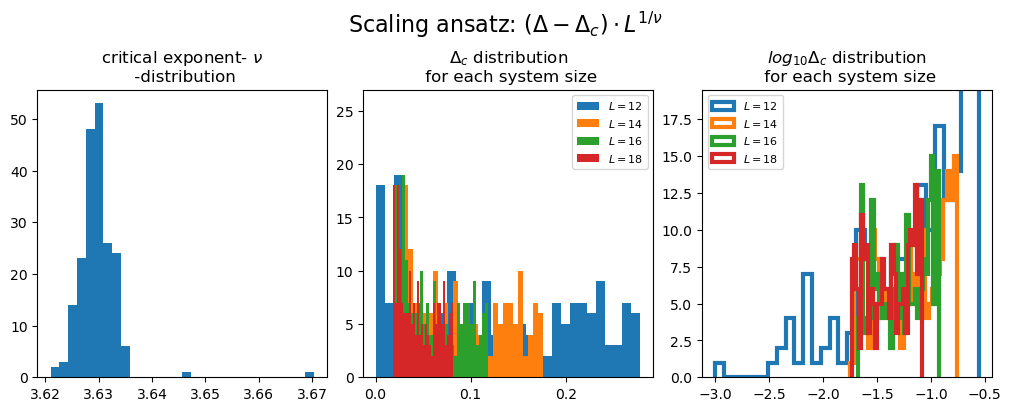

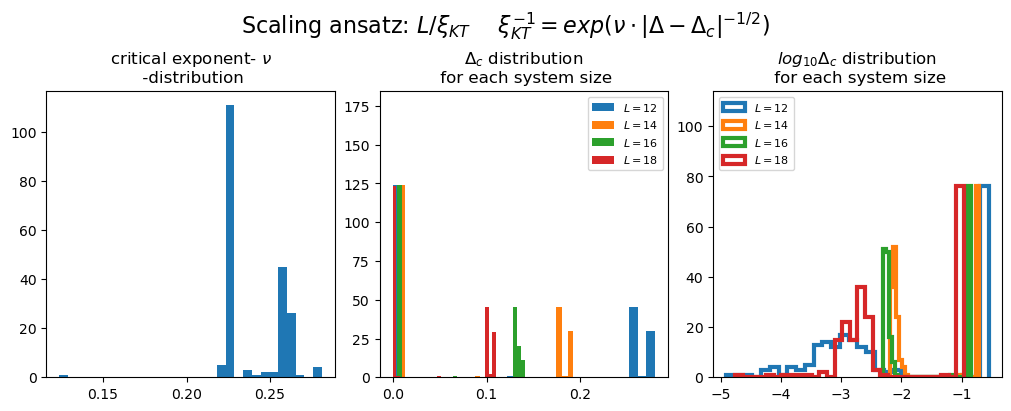

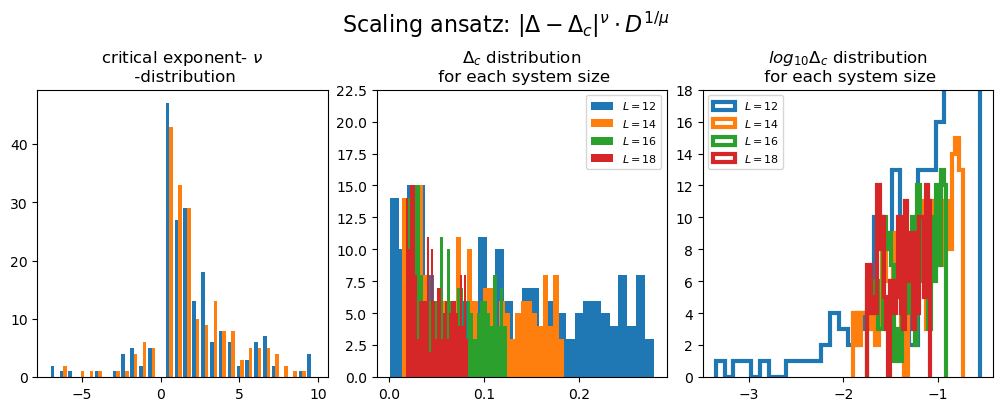

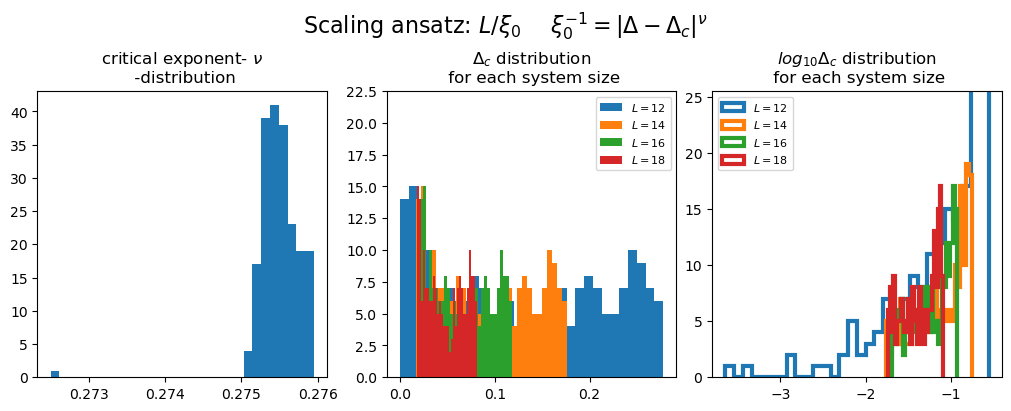

In [4]:
plot_dist(vs='g', scaling_ansatz='classic', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='KT', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='FGR', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='RG', crit_fun='free')

# DISTRIBUTIONS $\Delta=0.55=const$

4.683985559247268
[0.08043915544948954, 0.05991801573985575, 0.03956728893475309, 0.023803676667039166]
0.1998811523255875
[0.037562767062735, 0.009496922800916671, 0.08691817873850273, 0.022023675406207796]
nan
[0.08080844420789676, 0.054858073901260455, 0.03271886097972565, 0.020513822135132073]
0.21353019678262464
[0.10182103546521315, 0.06896841245675246, 0.04244000381040051, 0.02540505188653607]


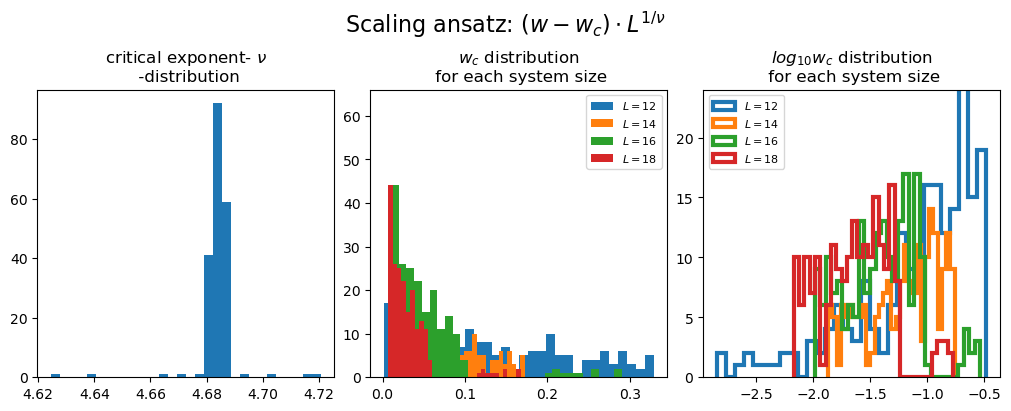

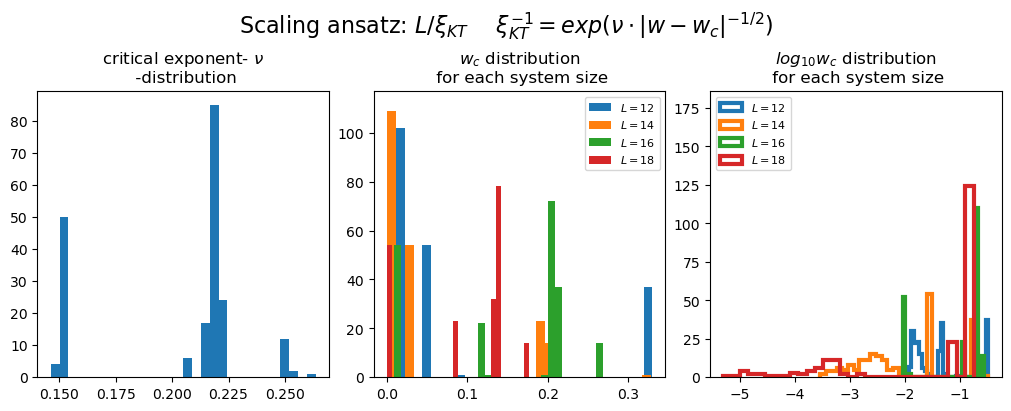

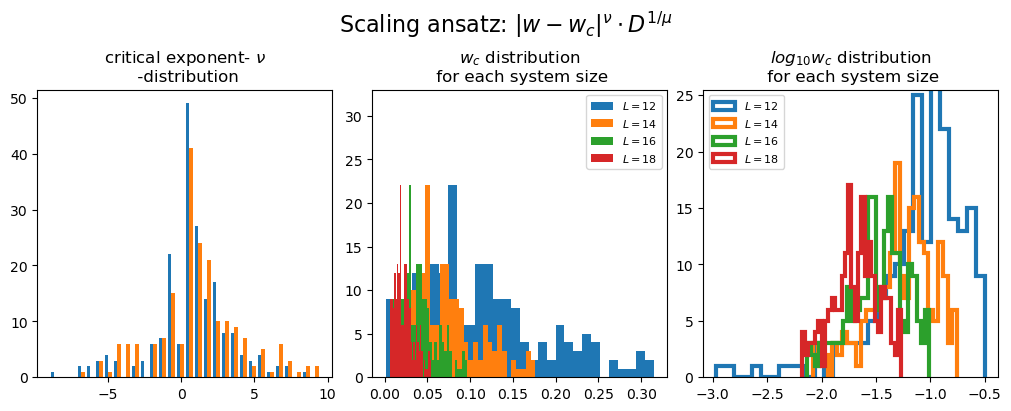

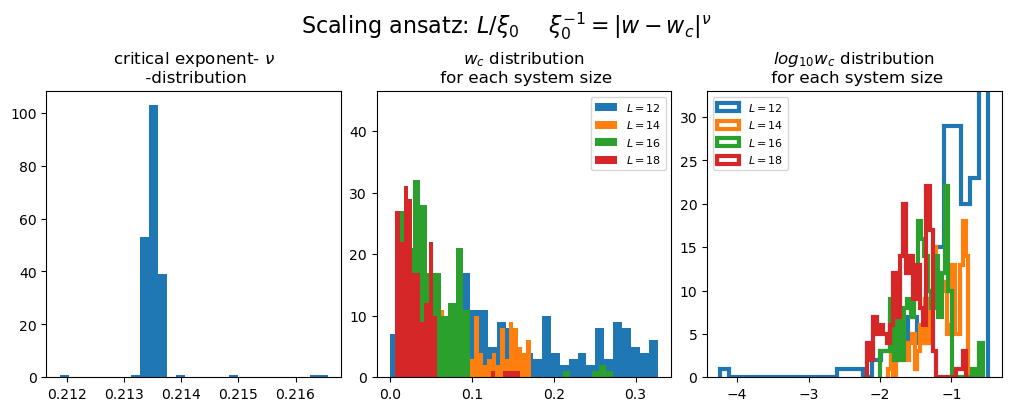

In [5]:

plot_dist(vs='w', scaling_ansatz='classic', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='KT', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='FGR', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='RG', crit_fun='free')

# SCALING ANSAETZE

In [6]:
from regex import X


def plot_gaps(axis, vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR'):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    cost_fun, crit_exp, crit_pars, num_of_sizes = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class)
    
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    cost_fun = np.mean(cost_fun)
    crit_exp = np.median(crit_exp)
    crit_pars = np.array([np.median(crit_pars[i]) for i in range(num_of_sizes)])
    
    xvals = []
    gap_ratio = []
    wH = []
    vals = range(12,19,2)
    for x in vals:
        cf.params_arr[settings['scaling_idx']] = x
        filename = cf.base_directory + "STATISTICS" + os.sep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat" 
        if os.path.exists(filename):
            stats = hfun.read_python_saved_dat_file(filename)
            r_tmp = stats[1]
            xvals.append(np.array([stats[0][i] for i, r in enumerate(r_tmp) if r > 0.40]))
            gap_ratio.append(np.array([stats[1][i] for i, r in enumerate(r_tmp) if r > 0.40]))
            wH.append(np.array([stats[5][i] for i, r in enumerate(r_tmp) if r > 0.40]))

    xvals = np.array(xvals)
    #vals, xvals, tau, gap_ratio = thouless.load(settings=settings)
    rescale_fun = cost.resc_functions_dict[scaling_ansatz]
    critical_fun = cost.crit_functions_dict[crit_fun]

    x_min = 1e10
    x_max = -1e10

    g_c_dev_GOE = []

    def atan_rescaled(x, alfa, x_c):
        return (0.5307 - 0.3867) * (np.arctan(alfa * (x - x_c)) + np.pi / 2.) / np.pi + 0.3867
    def erf_rescaled(x, alfa, x_c):
        return (0.5307 - 0.3867) * (erf(alfa * (x - x_c)) + 2) / 2 + 0.3867
        
    for i in range(num_of_sizes):
        idx = 0
        var = 0
        while var < 0.525: var = gap_ratio[i][idx];  idx += 1;
        g_c_dev_GOE.append(xvals[i][idx])

        xpoints = (rescale_fun(xvals[i], vals[i], critical_fun, crit_exp, *crit_pars))
        axis.scatter(xpoints, gap_ratio[i], s=5)
        xxx = np.linspace(-1e6, 1e6, 10000)
        if False and i == num_of_sizes - 1:
            
            try:
                pars, pcov = fit(f=atan_rescaled, 
                            xdata=xpoints, 
                            ydata=gap_ratio[i])
            except RuntimeError:
                pars = [0.5, 0]
            axis.plot(xpoints, atan_rescaled(xpoints, *pars), linestyle = '--', color = 'black', label = 'atan fit')
            try:
                pars, pcov = fit(f=erf_rescaled, 
                            xdata=xpoints, 
                            ydata=gap_ratio[i])
            except RuntimeError:
                pars = [0.5, 0]
            axis.plot(xpoints, atan_rescaled(xpoints, *pars), linestyle = '--', color = 'red', label = 'erf fit')

        idx = 0
        x = 0
        while x < 0.385:    x = gap_ratio[i][idx];  idx += 1;
        if idx < xpoints.size:
            if xpoints[idx] < x_min: x_min = xpoints[idx]
        else:
            x_min = min(xpoints)
        idx = 0
        x = 0
        while x < 0.525:     x = gap_ratio[i][idx];  idx += 1;
        if idx < xpoints.size:
            if xpoints[idx] > x_max: x_max = xpoints[idx]

    x_min = 2.0 * x_min if x_min < 0 else 0.25 * x_min
    x_max = 2.5 * x_max if x_max > 0 else 0.5 * x_max
    if crit_fun == 'free_inv':
        crit_pars = np.array([1. / x for x in crit_pars])
    
    xlab = cost.scale_ansatz_label[scaling_ansatz](lab)
    
    hfun.set_plot_elements(axis = axis, ylabel = "r", xlabel = xlab, settings=settings, 
                            font_size=8, set_legend=True, xlim=(None, None), ylim=(None, None))
    axis.set_xscale('linear')
    axis.set_yscale('linear')
    axis.set_ylim(0.37, 0.54)
    axis.set_xlim(x_min, x_max)

    axis.axhline(y=0.5307, xmin=0.35, xmax = 1, ls='--', color='black')
    axis.axhline(y=0.3867, xmin = 0, xmax=0.35, ls='--', color='black')

    width = 0.4
    height = 0.4
    left, bottom, width, height = [1 - width, 0.15, width, height / 0.8]
    ax = hfun.add_subplot_axes(axis, [left, bottom, width, height])
    sizes = np.array([12 + 2 * i for i in range(num_of_sizes)])


    #p2 = ax.plot(sizes, g_c_dev_GOE, color='red', label=r"$%s_c$"%lab, linewidth=0, marker = 'o')
    
    #ax.plot(sizes, np.array(fit_func(sizes, 1.0, 1/3.)) / fit_func(sizes[0], 1.0, 1/3.) * crit_pars[0], linestyle='--', color='red', label=r"$\sqrt[3]{\omega_H}$")
    def plot_fit(crit, label = r"$%s^*$"%lab, plot_line = True, color = 'black'):
        wH_at_crit = []
        for i in range(num_of_sizes):
            idx = min(range(len(wH[i])), key=lambda j: abs(wH[i][j] - crit[i]))
            wH_at_crit.append(wH[i][idx])
        wH_at_crit = np.array(wH_at_crit)
        
        pars, pcov = fit(f=power_law, 
                            xdata=wH_at_crit[1:], 
                            ydata=crit[1:])
        print(pars[1])
        fit_name = r"$\omega_H^{%.2f}$"%pars[0]
        
        if plot_line:
            ax.plot(wH_at_crit, wH_at_crit**0.5, linestyle='--', color='blue', label=r"$\sqrt{\omega_H}$")
        p = ax.plot(wH_at_crit, crit, color=color, label=label + fit_name, linewidth=0, marker = 'o')
        ax.plot(wH_at_crit, power_law(wH_at_crit, *pars), linestyle='--', color=p[0].get_color())
        
    plot_fit(crit = crit_pars, label = r"$%s^*\sim$"%lab, color = 'black')
    plot_fit(crit = g_c_dev_GOE, label = r"$%s_c\sim$"%lab, plot_line = False, color = 'red')
    
    if vs == 'g':
        S_c_crossing = [0.083, 0.044, 0.031, 0.023]
        plot_fit(crit = S_c_crossing, label = r"$%s^S(L, L-2)\sim$"%lab, plot_line = False, color = 'green')

    hfun.set_plot_elements(axis = ax, ylabel = lab + "_c", xlabel = "\\omega_H", settings=settings, 
                            font_size=8, set_legend=False, xlim=(None, None), ylim=(None, None))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.65), frameon = True, fontsize = 8, ncol=1)
    #ax.set_xscale('linear')
    #ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    #ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    #ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    #ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    
    axis.set_title(r"$Cost Function=%.4f\qquad\nu=%.4f$"%(cost_fun, 1./crit_exp if scaling_ansatz == 'classic' else crit_exp ))

print("ek")


ek


No handles with labels found to put in legend.


0.7719043926574461
1.9856773612150849


No handles with labels found to put in legend.


0.9080628298542621
1.9856773612150849


No handles with labels found to put in legend.


0.013520716140980913
1.9856773612150849


IndexError: index 3 is out of bounds for axis 0 with size 3

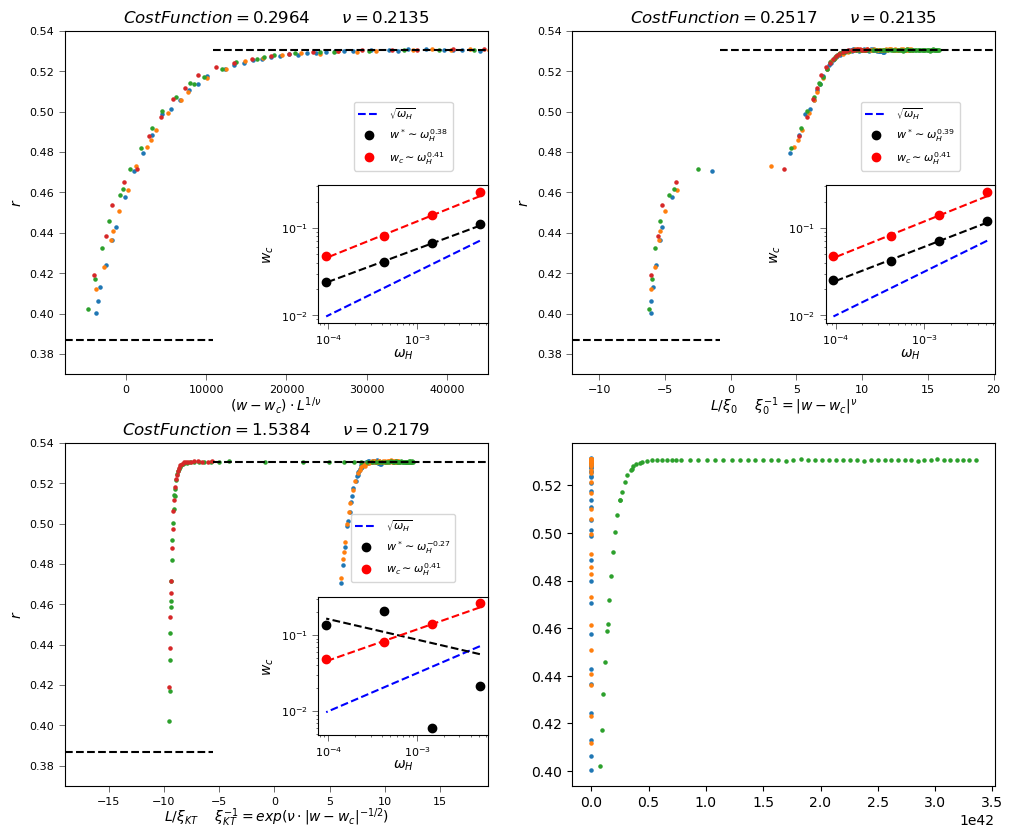

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(12,10), dpi = 100)


plot_gaps(ax1, vs = 'w', scaling_ansatz='classic')
plot_gaps(ax2, vs = 'w', scaling_ansatz='RG')
plot_gaps(ax3, vs = 'w', scaling_ansatz='KT')
plot_gaps(ax4, vs = 'w', scaling_ansatz='FGR')

#fig.subplots_adjust(wspace=0.4, hspace=0.2)


No handles with labels found to put in legend.


0.34466007958368367
1.5344732271929966
0.2395180304081015


No handles with labels found to put in legend.


0.4229287930284002
1.5344732271929966
0.2395180304081015


No handles with labels found to put in legend.


0.11736689909699848
1.5344732271929966
0.2395180304081015


No handles with labels found to put in legend.


0.012899763561053655
1.5344732271929966
0.2395180304081015


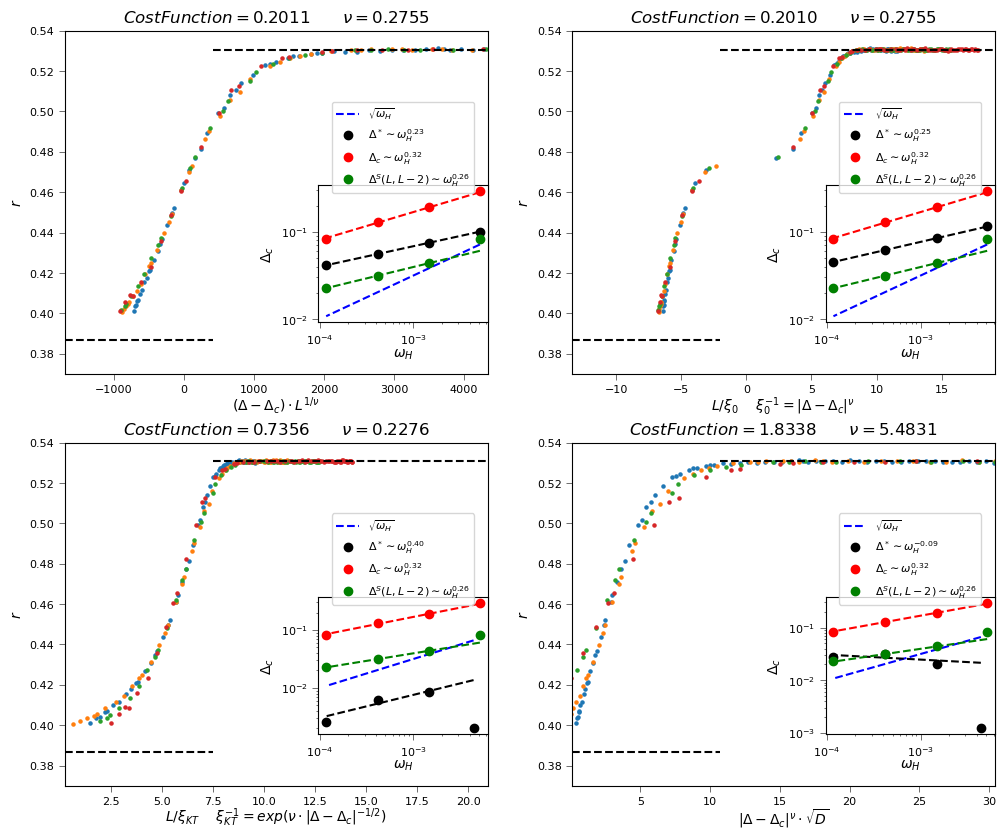

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(12,10), dpi = 100)


plot_gaps(ax1, vs = 'g', scaling_ansatz='classic')
plot_gaps(ax2, vs = 'g', scaling_ansatz='RG')
plot_gaps(ax3, vs = 'g', scaling_ansatz='KT')
plot_gaps(ax4, vs = 'g', scaling_ansatz='FGR')

#fig.subplots_adjust(wspace=0.4, hspace=0.2)

1) ADD ERROR FUNCTION

2) 1/nu in ansatz

3) FGR with hilbert space dimension

4) collapse data (divide by mean level spacing, shift and then collapse rest with either wH, D or L)
 

## FREE INVERSE

0.06802588405030532
1.9856773612150849
0.0682312864485063
1.9856773612150849
6.813422213238477
1.9856773612150849
0.015462143456676167
1.9856773612150849


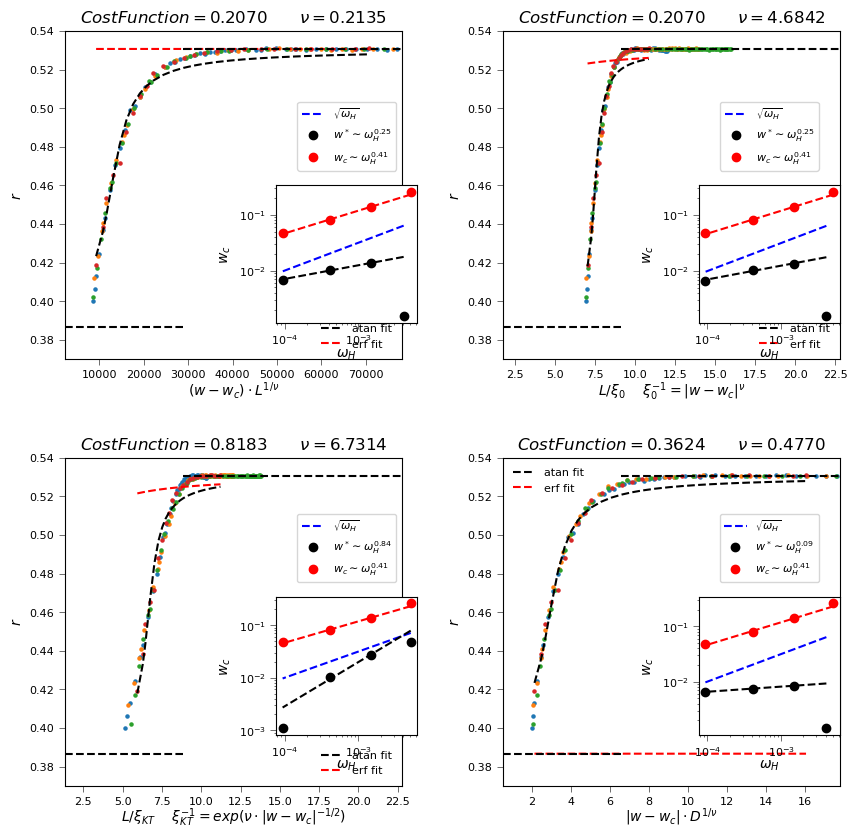

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 100)


plot_gaps(ax1, vs = 'w', scaling_ansatz='classic', crit_fun='free_inv')
plot_gaps(ax2, vs = 'w', scaling_ansatz='RG', crit_fun='free_inv')
plot_gaps(ax3, vs = 'w', scaling_ansatz='KT', crit_fun='free_inv')
plot_gaps(ax4, vs = 'w', scaling_ansatz='FGR', crit_fun='free_inv')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

0.018623346927328418
1.5344732271929966
0.2395180304081015
0.018519199661971197
1.5344732271929966
0.2395180304081015
0.1789421249319251
1.5344732271929966
0.2395180304081015
0.00737676472343069
1.5344732271929966
0.2395180304081015


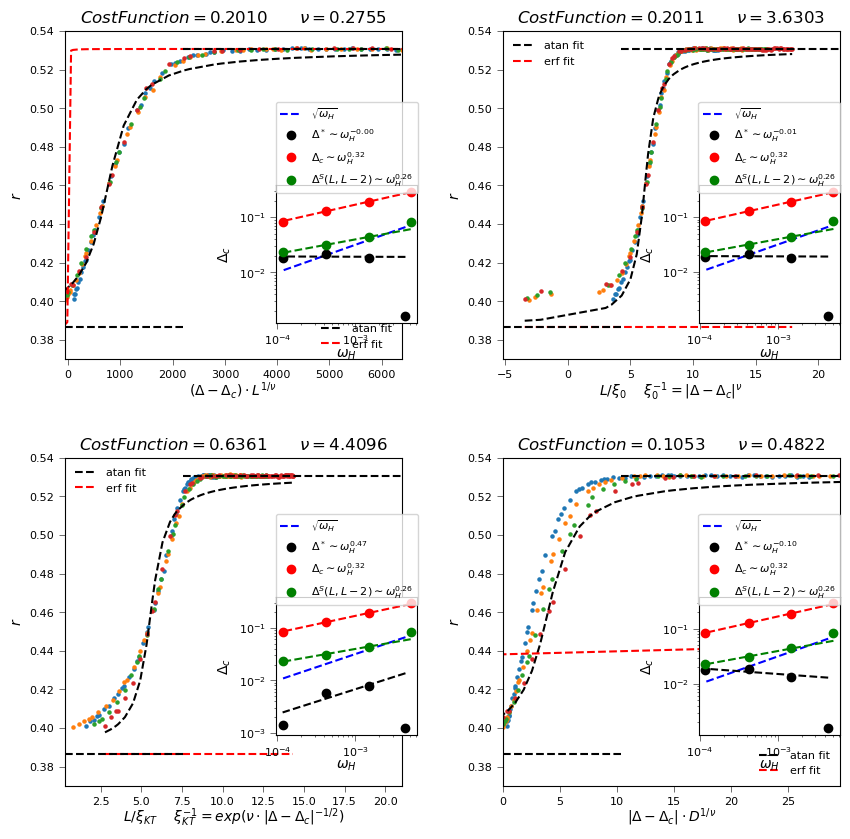

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 100)


plot_gaps(ax1, vs = 'g', scaling_ansatz='classic', crit_fun='free_inv')
plot_gaps(ax2, vs = 'g', scaling_ansatz='RG', crit_fun='free_inv')
plot_gaps(ax3, vs = 'g', scaling_ansatz='KT', crit_fun='free_inv')
plot_gaps(ax4, vs = 'g', scaling_ansatz='FGR', crit_fun='free_inv')

fig.subplots_adjust(wspace=0.3, hspace=0.3)